In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import wave
import librosa

In [2]:
audio_path =r"C:\Users\Dhanush Joy\Downloads\WhatsApp Audio 2023-06-23 at 20.05.21.mp3 (online-audio-converter.com).mp3"
s, sample_rate = librosa.load(audio_path)
s+=1;
from IPython.display import Audio
Audio(s,rate=22050)

124928


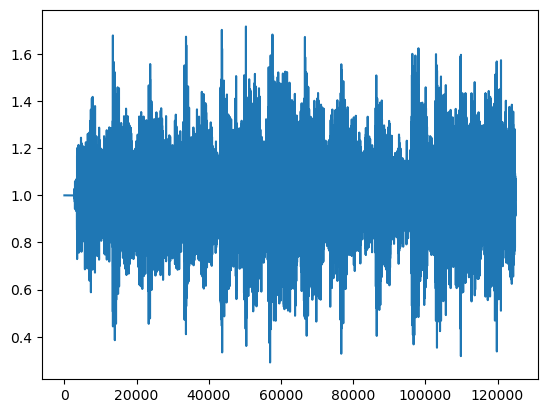

In [3]:
plt.plot(s)
print(len(s))

In [4]:
def quant(s,L):
    stepsize=(np.max(s)-np.min(s))/(L-1)
    a=np.round((s-np.min(s))/stepsize)
    q=np.min(s) + (a*stepsize)
    qsum=np.sum(q)
    e=np.square(s-q)
    esum=np.sum(e)
    snr=np.linalg.norm(qsum)/np.linalg.norm(esum)
    return q,stepsize,snr,a

<StemContainer object of 3 artists>

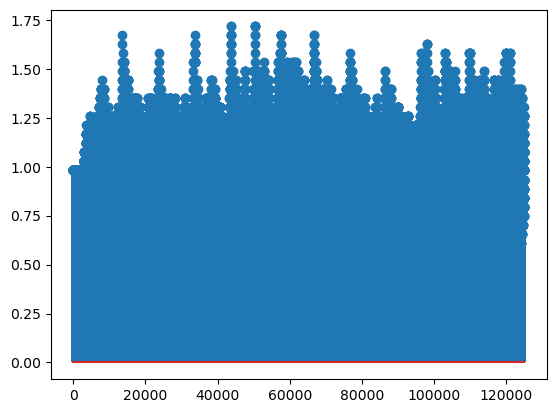

In [5]:
L=32
n=int(math.log2(L))
q,d,w,a=quant(s,L)
plt.stem(q)

In [6]:
import heapq
from collections import defaultdict

def generate_huffman_code(quantized_values):
    frequency = defaultdict(int)
    for value in quantized_values:
        frequency[value] += 1

    heap = [[weight, [symbol, ""]] for symbol, weight in frequency.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])

    huffman_code = sorted(heapq.heappop(heap)[1:], key=lambda p: (len(p[-1]), p))
    return huffman_code
huffman_code = generate_huffman_code(q)
print(huffman_code)
encode=[]
for i in q:
    list1=[]
    for symbol in huffman_code:
        if i==symbol[0]:
            encode.append(symbol[1])
encode1=[]
for i in encode:
    list2=[]
    for j in i:
        if j=='1':
            list2.append(1)
        else:
            list2.append(0)
    encode1.append(list2)
        

[[0.93472755, '010'], [0.98071057, '101'], [1.0266936, '011'], [1.0726767, '001'], [0.7967784, '0000'], [0.84276146, '1100'], [0.8887445, '1111'], [1.1186597, '1110'], [1.1646428, '1001'], [0.7507953, '10001'], [1.2106259, '11011'], [1.256609, '10000'], [0.6588292, '000110'], [0.7048123, '110101'], [1.302592, '110100'], [1.3485751, '000100'], [0.61284614, '0001110'], [1.3945582, '0001010'], [0.5668631, '00011111'], [1.440541, '00010111'], [0.52088004, '000111100'], [1.4865241, '000101101'], [0.474897, '0001111011'], [1.5325072, '0001011001'], [0.42891395, '00010110001'], [1.5784903, '00011110101'], [0.38293087, '000111101001'], [1.6244733, '000101100001'], [1.6704564, '000101100000'], [0.33694783, '0001111010001'], [0.29096478, '00011110100000'], [1.7164395, '00011110100001']]


In [7]:
symb=[]
for i in huffman_code:
        symb.append(i[1])

In [8]:
symb2=[]
for i in symb:
    list8=[]
    for j in i:
        if j=='1':
            list8.append(1)
        else:
            list8.append(0)
    symb2.append(list8)


In [9]:
def hamming_coder(msg):
    p=0;
    while 2**p<len(msg)+p+1:
        p=p+1;
    ham_code=[0]*(len(msg)+p)
    j=0;
    for i in np.arange(1,len(ham_code)+1):
        if math.log2(i)!=np.round(math.log2(i)):
            ham_code[i-1]=msg[j] 
            j=j+1
    #parity gen
    parity_list=[]
    for i in range(p):
        parity=0
        for j in np.arange(2**i,len(ham_code)+1,2**(i+1)):
            parity^=ham_code[j-1];
        parity_list.append(parity)
    j=0
    for i in np.arange(1,len(ham_code)+1):
        if math.log2(i)==np.round(math.log2(i)):
            ham_code[i-1]=parity_list[j]
            j=j+1
    return(ham_code)

In [10]:
hammig_code=[]
for i in range(len(s)):
    hammig_code.append(hamming_coder(encode1[i]))

In [11]:
bpsk=[]
for i in hammig_code:
    list3=[]
    for j in i:
        if j==1:
            list3.append(1)
        else:
            list3.append(-1)
    bpsk.append(list3)
print(len(bpsk))

124928


In [12]:
def noise(snr_db):
    sigma = np.sqrt(1 / (10**(snr_db / 10)))
    noise = np.random.normal(0, sigma/np.sqrt(2), len(bpsk)) + 1j * np.random.normal(0, sigma/np.sqrt(2),len(bpsk))
    return noise

In [13]:
rec_sig=[]
snr_db=15
sigma = np.sqrt(1 / (10**(snr_db / 10)))
for i in bpsk:
    list4=[]
    for j in i:
        noise = (np.random.normal(0, sigma/np.sqrt(2),1) + 1j * np.random.normal(0, sigma/np.sqrt(2),1))
        k=j+noise
        list4.append(k)
    rec_sig.append(list4)
print(len(rec_sig))


124928


In [14]:
decode=[]
for i in rec_sig:
    list5=[]
    for j in i:
        x=np.sqrt((j-1)**2)
        y=np.sqrt((j-(-1)**2))
        if x<=y:
            list5.append(1)
        else:
            list5.append(-1)
    decode.append(list5)
print(len(decode))


124928


In [15]:
decode=[]
for i in rec_sig:
    list5=[]
    for j in i:
        x=np.sqrt((j-1)**2)
        y=np.sqrt((j-(-1)**2))
        if x<=y:
            list5.append(1)
        else:
            list5.append(-1)
    decode.append(list5)
print(len(decode))

reconstruct_arr=[]
for i in decode:
    list6=[]
    for j in i:
        if j==-1:
            list6.append(0)
        else:
            list6.append(1)
    reconstruct_arr.append(list6)

124928


In [16]:
def hammig_decoder(received_code):
    p=0
    while 2**p<len(received_code)+1:
        p=p+1
    syn=0
    for i in range(p):
        parity=0
        for j in np.arange(2**i,len(received_code)+1,2**(i+1)):
            parity^=received_code[j-1];
        syn+=parity*2**i
    if syn!=0:
        received_code[syn-1]^=1

    msg=""
    for i in np.arange(1,len(received_code)+1):
        if math.log2(i)!=np.round(math.log2(i)):
            msg+=(str(received_code[i-1]))
    return(msg)

In [17]:
r_pcm=[]
for i in range(len(s)):
    r_pcm.append((hammig_decoder(reconstruct_arr[i])))

In [18]:
r_pcm2=[]
for i in r_pcm:
    list7=[]
    for j in i:
        if j=='1':
            list7.append(1)
        else:
            list7.append(0)
    r_pcm2.append(list7)

In [19]:
def calculate_code_similarity(code1, code2):
    similarity = 0
    for bit1, bit2 in zip(code1, code2):
        if bit1 == bit2:
            similarity += 1
        else:
            break
    return similarity

def huffman_decode(received_codes, original_codes):
    huffman_tree = {}
    for code in original_codes:
        node = huffman_tree
        for bit in code:
            if bit not in node:
                node[bit] = {}
            node = node[bit]
        node['code'] = code

    decoded_values = []
    for received_code in received_codes:
        best_similarity = 0
        best_code = None
        for original_code in original_codes:
            similarity = calculate_code_similarity(received_code, original_code)
            if similarity > best_similarity:
                best_similarity = similarity
                best_code = original_code

        if best_code is None:
            raise ValueError("No matching original code found for received code")
        decoded_values.append(best_code)

    return decoded_values

d_values = huffman_decode(r_pcm2, symb2)




In [20]:
dfinal=[]
for i in d_values:
    val = "".join(str(k) for k in i)
    dfinal.append(val)

In [21]:
r_audio=[]
for i in dfinal:
    for symbol in huffman_code:
        if i==symbol[1]:
            r_audio.append(symbol[0])


In [22]:
from IPython.display import Audio
Audio((r_audio),rate=22050)